In [1]:
import pandas as pd
import numpy as np

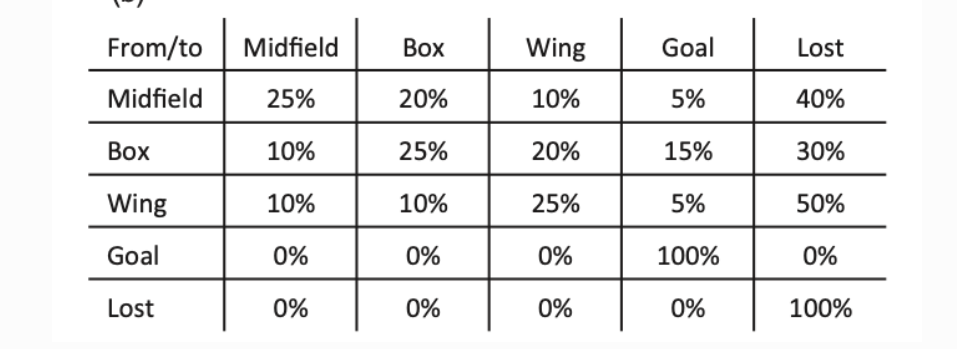

In [2]:
#Pass matrix
A = np.matrix([[0.25, 0.20, 0.1], [0.1, 0.25, 0.2],[0.1, 0.1, 0.25]])
#Goal vector
g = np.transpose(np.matrix([0.05, 0.15, 0.05]))

Resolvemos la ecuación (I-A)xT = g -> para obtener xT

In [3]:
xt1 = np.linalg.solve(np.identity(3) - A,g)
xt1

matrix([[0.14991763],
        [0.25205931],
        [0.12026359]])

In [4]:
xt = np.transpose(xt1)
print('Expected Threat')
print('Central, Box, Wing')
print(xt)

Expected Threat
Central, Box, Wing
[[0.14991763 0.25205931 0.12026359]]


### Iterative Method

In [11]:
xt2 = np.zeros((3,1)) # Arrancamos cuando probabilidad de gol es 0 (justo cuando recuperamos el balón o empieza la posesión)
print('Central, Box, Wing')
for i in range(10):
    print('Probability of scoring after {} passes'.format(i))
    print(np.transpose(np.matmul(A,xt2) + g))
    xt2 = np.matmul(A,xt2) + g
xt = np.transpose(xt2)
print('\nExpected Threat')
print('Central, Box, Wing')
print(xt)

Central, Box, Wing
Probability of scoring after 0 passes
[[0.05 0.15 0.05]]
Probability of scoring after 1 passes
[[0.0975 0.2025 0.0825]]
Probability of scoring after 2 passes
[[0.123125 0.226875 0.100625]]
Probability of scoring after 3 passes
[[0.13621875 0.23915625 0.11015625]]
Probability of scoring after 4 passes
[[0.14290156 0.24544219 0.11507656]]
Probability of scoring after 5 passes
[[0.14632148 0.24866602 0.11760352]]
Probability of scoring after 6 passes
[[0.14807393 0.25031936 0.11889963]]
Probability of scoring after 7 passes
[[0.14897232 0.25116716 0.11956424]]
Probability of scoring after 8 passes
[[0.14943293 0.25160187 0.11990501]]
Probability of scoring after 9 passes
[[0.14966911 0.25182476 0.12007973]]

Expected Threat
Central, Box, Wing
[[0.14966911 0.25182476 0.12007973]]


### Simulation Method - Monte Carlo

In [12]:
num_sims=50
xT3=np.zeros(3)

description = {0: 'Central', 1: 'Wing', 2: 'Box' }

for i in range(3):
    num_goals = 0

    print('---------------')
    print('Start from ' + description[i] )
    print('---------------')

    for n in range(num_sims):

        ballinplay=True
        #Initial state is i
        s = i
        describe_possession=''

        while ballinplay:
            r=np.random.rand() # numero entre 0 y 1

            # Make commentary text
            describe_possession = describe_possession + ' - ' + description[s]


            #Cumulative sum of in play probabilities
            c_sum=np.cumsum(A[s,:])
            new_s = np.sum(r>c_sum)
            if new_s>2:
                #Ball is either goal or out of play
                ballinplay=False
                if r < g[s] + c_sum[0,2]:
                    #Its a goal!
                    num_goals = num_goals + 1
                    describe_possession = describe_possession + ' - Goal!'
                else:
                    describe_possession = describe_possession + ' - Out of play'
            s = new_s

        print(describe_possession)

    xT3[i] = num_goals/num_sims


print('\n\n---------------')
print('Expected Threat')
print('Central, Box, Wing')
print(xT3)

---------------
Start from Central
---------------
 - Central - Out of play
 - Central - Central - Out of play
 - Central - Out of play
 - Central - Box - Central - Central - Out of play
 - Central - Box - Wing - Out of play
 - Central - Out of play
 - Central - Central - Wing - Out of play
 - Central - Out of play
 - Central - Out of play
 - Central - Wing - Box - Goal!
 - Central - Out of play
 - Central - Out of play
 - Central - Out of play
 - Central - Out of play
 - Central - Box - Out of play
 - Central - Box - Out of play
 - Central - Out of play
 - Central - Central - Box - Wing - Box - Wing - Out of play
 - Central - Out of play
 - Central - Goal!
 - Central - Out of play
 - Central - Wing - Wing - Central - Out of play
 - Central - Central - Goal!
 - Central - Out of play
 - Central - Wing - Box - Out of play
 - Central - Box - Box - Wing - Central - Central - Central - Wing - Out of play
 - Central - Out of play
 - Central - Central - Central - Wing - Out of play
 - Central